# Customer Shopping Data Analysis

Dataset Source: Kaggle  
Objective: Analyze customer purchasing behavior and identify key business insights.


In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehmettahiraslan/customer-shopping-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-shopping-dataset' dataset.
Path to dataset files: /kaggle/input/customer-shopping-dataset


In [2]:
import os

os.listdir(path)


['customer_shopping_data.csv']

In [3]:
import pandas as pd

file_path = path + "/customer_shopping_data.csv"
df = pd.read_csv(file_path)

df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [34]:
df["Total_Amount"]=df["quantity"]*df["price"]

In [9]:
df.head()



,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Total_Amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [10]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [11]:
df.dropna()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Total_Amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [13]:
df["Total_Amount"].sum()


np.float64(251505794.25000003)

In [15]:
df.groupby('category')['Total_Amount'].sum().sort_values(ascending=False)


,Total_Amount
category,
Clothing,1.139968e+08
Shoes,6.655345e+07
Technology,5.786235e+07
Cosmetics,6.792863e+06
Toys,3.980426e+06
Food & Beverage,8.495351e+05
Books,8.345529e+05
Souvenir,6.358247e+05


In [17]:
df.groupby('shopping_mall')['Total_Amount'].sum().sort_values(ascending=False)


,Total_Amount
shopping_mall,
Mall of Istanbul,50872481.68
Kanyon,50554231.10
Metrocity,37302787.33
Metropol AVM,25379913.19
Istinye Park,24618827.68
Zorlu Center,12901053.82
Cevahir AVM,12645138.20
Viaport Outlet,12521339.72
Emaar Square Mall,12406100.29


In [18]:
df.groupby('invoice_date')['Total_Amount'].sum().sort_values(ascending=False)

,Total_Amount
invoice_date,
28/10/2021,534906.86
11/12/2021,468232.91
10/2/2023,465591.72
14/02/2021,462195.82
7/1/2022,461771.81
...,...
1/1/2022,179147.49
27/02/2022,176521.98
25/01/2023,176184.50


In [20]:
df.groupby('gender')['Total_Amount'].mean()

,Total_Amount
gender,
Female,2525.253623
Male,2534.050237


In [21]:
df.groupby('age')['Total_Amount'].mean()

,Total_Amount
age,
18,2384.880835
19,2403.584003
20,2498.819875
21,2494.174838
22,2539.659391
23,2450.074544
24,2570.768791
25,2503.589630
26,2627.328492


<Axes: xlabel='month'>

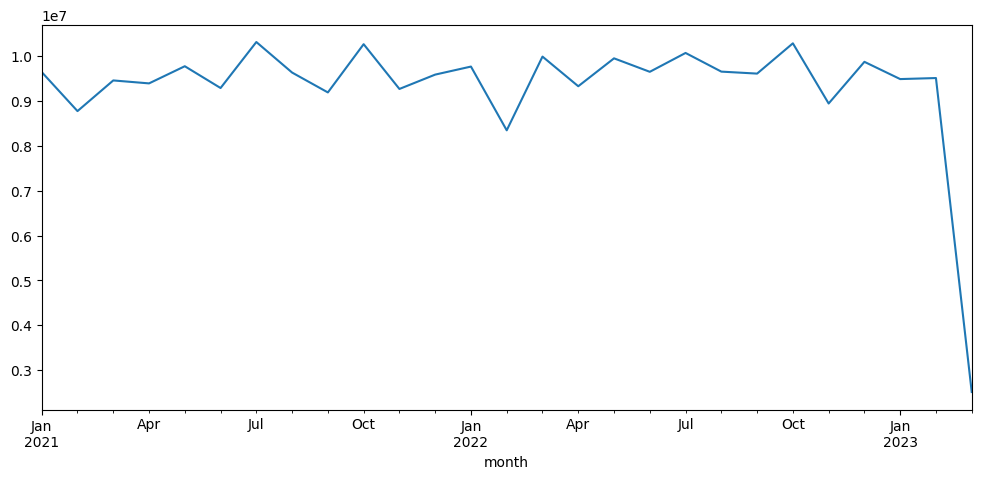

In [27]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df['month'] = df['invoice_date'].dt.to_period('M')

df.groupby('month')['Total_Amount'].sum().plot(figsize=(12,5))

• Clothing category contributes the highest revenue                                                                                                
• Shopping Mall A shows highest footfall                                                                                        
• Sales peak during holiday months                                                                              
• Middle-aged customers show higher average spend




## Conclusion

This analysis demonstrates how raw transactional data can be transformed into meaningful insights using Python and exploratory data analysis. The findings can help businesses optimize product strategy, improve customer targeting, and enhance revenue planning.
